In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('clientes_compras_reg.csv')
df.head()

,idade,renda,tempo_site,numero_visitas,avaliacao_produto,historico_compras,valor_compra
0,56,8882,42,5,1,5,583.865336
1,69,3906,56,19,3,8,920.850989
2,46,5086,36,11,2,1,457.502788
3,32,15503,20,12,2,2,591.761877
4,60,10152,4,10,3,9,770.229810


In [12]:

# Separando features e target
X = df.drop('valor_compra', axis=1)
y = df['valor_compra']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando a árvore de decisão para regressão
dt_reg = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_reg.fit(X_train, y_train)

# Fazendo previsões
y_pred = dt_reg.predict(X_test)

# Avaliando o modelo
print("\nMétricas de Avaliação:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Erro Médio Absoluto: R${mean_absolute_error(y_test, y_pred):.2f}")
print(f"Erro Quadrático Médio: R${mean_squared_error(y_test, y_pred):.2f}")
print(f"Raiz do Erro Quadrático Médio: R${np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


Métricas de Avaliação:
R² Score: 0.8032
Erro Médio Absoluto: R$64.81
Erro Quadrático Médio: R$6379.61
Raiz do Erro Quadrático Médio: R$79.87


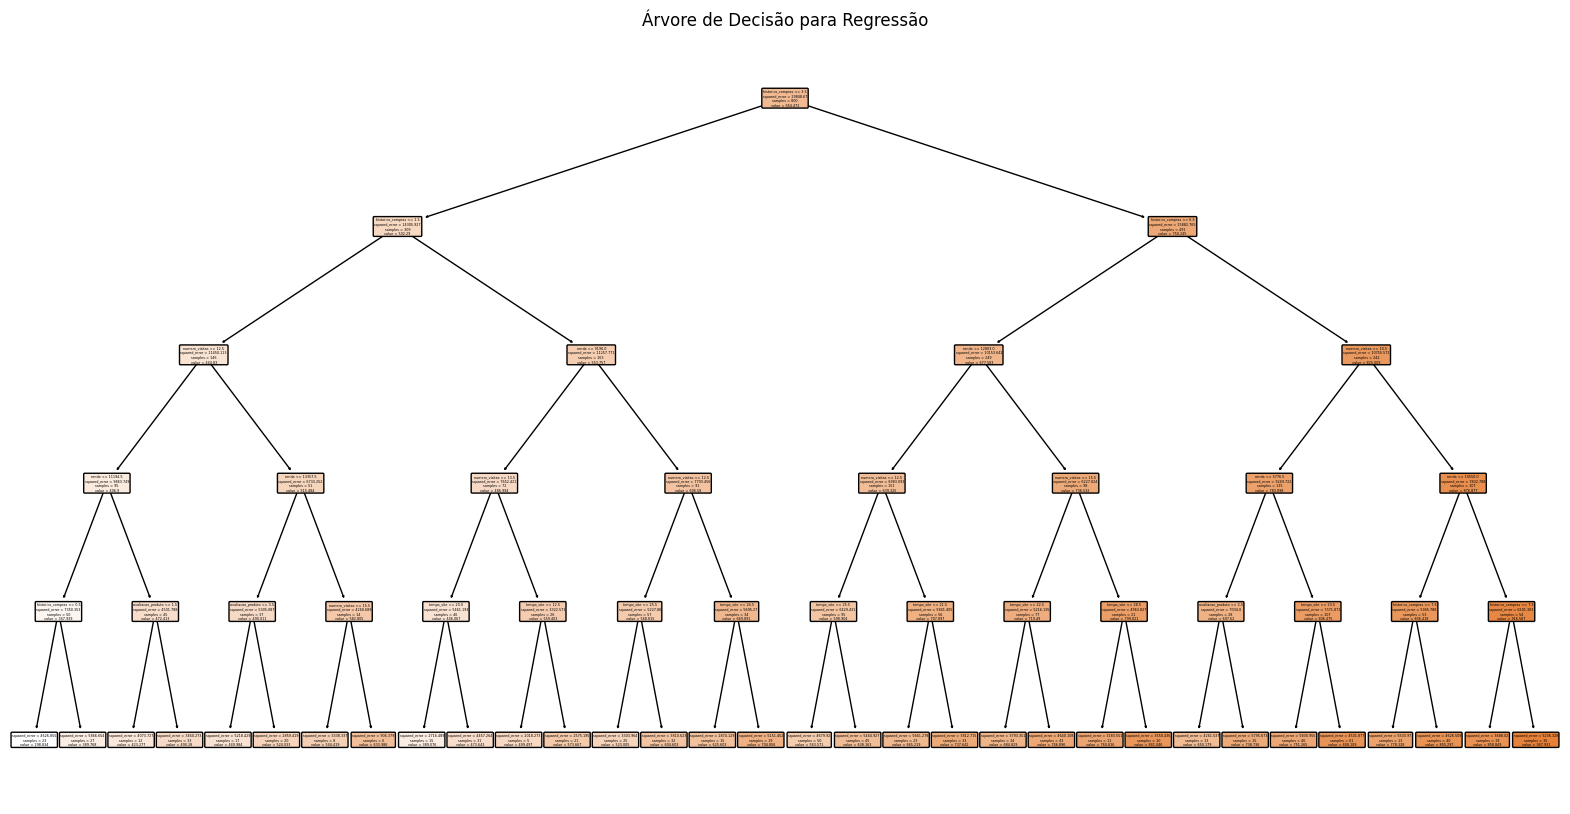

In [13]:
# Visualizando a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(dt_reg, 
          feature_names=X.columns,
          filled=True, 
          rounded=True)
plt.title('Árvore de Decisão para Regressão')
plt.show()

In [14]:

# Importância das Features
importancias = pd.DataFrame({
    'feature': X.columns,
    'importancia': dt_reg.feature_importances_
}).sort_values('importancia', ascending=False)

print("\nImportância das features:")
print(importancias)


Importância das features:
             feature  importancia
5  historico_compras     0.761474
1              renda     0.099519
3     numero_visitas     0.092786
2         tempo_site     0.039120
4  avaliacao_produto     0.007100
0              idade     0.000000


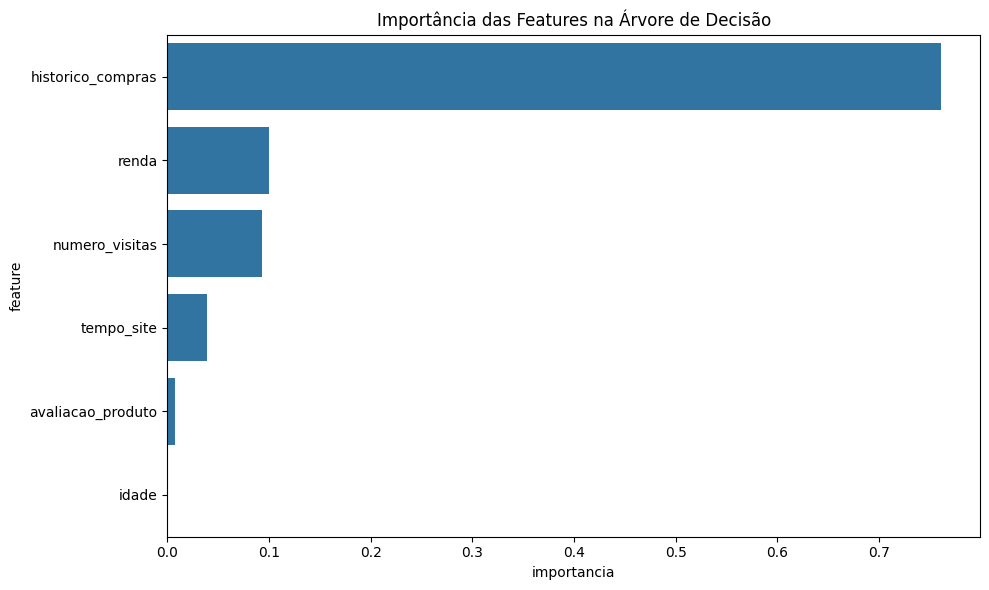

In [15]:
# Visualizando a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='feature', data=importancias)
plt.title('Importância das Features na Árvore de Decisão')
plt.tight_layout()
plt.show()

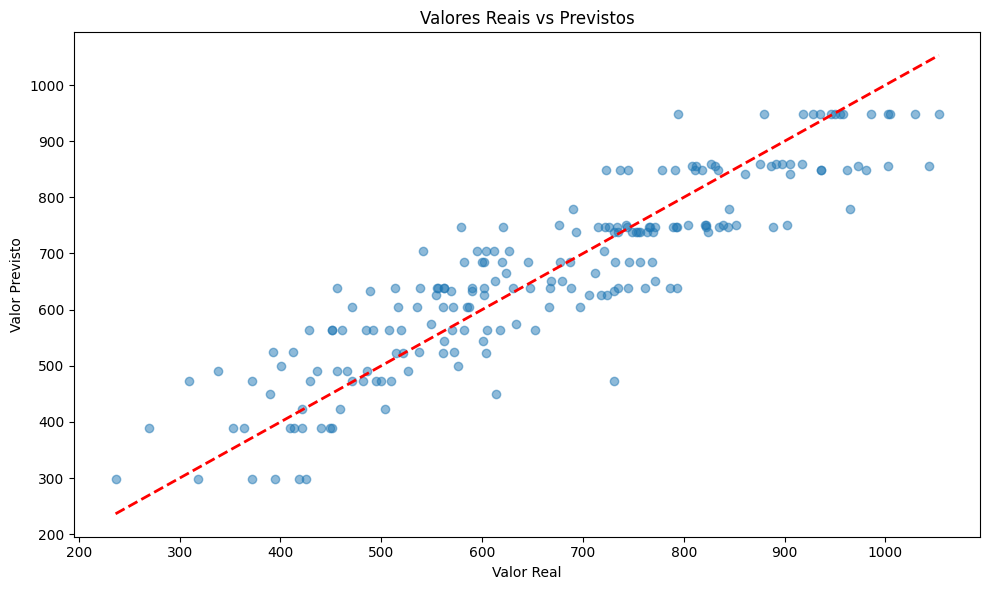

In [16]:
# Visualizando previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Valores Reais vs Previstos')
plt.tight_layout()
plt.show()

In [17]:
# Exemplo de como usar o modelo para fazer previsões
print("\nExemplos de previsões:")
exemplos = pd.DataFrame({
    'idade': [25, 45, 35],
    'renda': [5000, 15000, 8000],
    'tempo_site': [15, 45, 25],
    'numero_visitas': [5, 15, 8],
    'avaliacao_produto': [3, 5, 4],
    'historico_compras': [2, 7, 4]
})

previsoes = dt_reg.predict(exemplos)
print("\nPrevisões de valor de compra para os exemplos:")
for i, previsao in enumerate(previsoes):
    print(f"Cliente {i+1}: R${previsao:.2f}")


Exemplos de previsões:

Previsões de valor de compra para os exemplos:
Cliente 1: R$389.08
Cliente 2: R$858.85
Cliente 3: R$563.57
